In [20]:
#IMPORTING NECESSARY PACAKETS
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random  #used for predictions
import numpy as np

In [2]:
#LOAD THE TRAINNING AND TESTING DATA(MNIST)
mnist = tf.keras.datasets.mnist #importing mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# x_train=x_train[0]
# img_len,img_width = x_train.shape

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
print(img_len," ",img_width)

NameError: name 'img_len' is not defined

In [8]:
#DEFINE NETWORK USING KERAS
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
#train the model using sgd
model.compile(optimizer="sgd",#Stochastic Gradient Descent
             loss="sparse_categorical_crossentropy", # It measures the dissimilarity between the true labels and the predicted class probabilities and aims to minimize this dissimilarity during training.
             metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6419 - accuracy: 0.8371 - val_loss: 0.3546 - val_accuracy: 0.9021
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3321 - accuracy: 0.9084 - val_loss: 0.2894 - val_accuracy: 0.9199
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2843 - accuracy: 0.9206 - val_loss: 0.2576 - val_accuracy: 0.9268
Epoch 4/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.2546 - accuracy: 0.9293 - val_loss: 0.2375 - val_accuracy: 0.9329
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2324 - accuracy: 0.9350 - val_loss: 0.2190 - val_accuracy: 0.9384
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2145 - accuracy: 0.9407 - val_loss: 0.2036 - val_accuracy: 0.9419
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1993 - accuracy: 0.9446 - val_loss: 0.1917 - val_accurac

In [12]:
#EVALUATE THE NETWORK
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 724us/step - loss: 0.1627 - accuracy: 0.9517
Loss=0.163
Accuracy=0.952


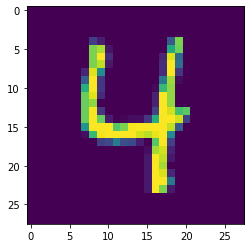

313/313 [==============================] - 0s 658us/step
Handwritten number in the image is= 4


In [21]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))
plt.show()

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
#Plot the training LOSS and ACCURACY


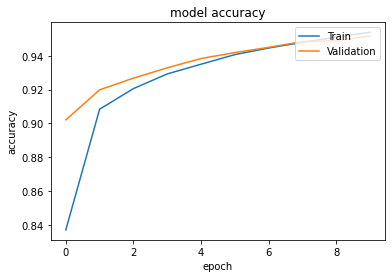

In [23]:
#Plotting Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

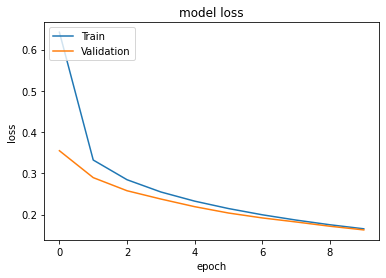

In [24]:
#plotting Trainning Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()